# 0. 환경설정

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
!pip install transformers
!pip install datasets==1.17.0
!pip install Korpora

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 11.8 MB/s 
     |████████████████████████████████| 182 kB 58.4 MB/s 
     |████████████████████████████████| 7.6 MB 50.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 306 kB 20.8 MB/s 
     |████████████████████████████████| 132 kB 61.3 MB/s 
     |████████████████████████████████| 212 kB 59.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 5.2 MB/s 


# 1. 데이터셋 Load

In [ ]:
from datasets import load_dataset

In [ ]:
dataset = load_dataset('smilegate-ai/kor_unsmile')

Downloading:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/290k [00:00<?, ?B/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/parquet/smilegate-ai--kor_unsmile-e0f75c6e3be1af78/0.0.0/1638526fd0e8d960534e2155dc54fdff8dce73851f21f031d2fb9c2cf757c121. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['문장', '여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean', '개인지칭', 'labels'],
        num_rows: 15005
    })
    valid: Dataset({
        features: ['문장', '여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean', '개인지칭', 'labels'],
        num_rows: 3737
    })
})

In [ ]:
dataset["train"][500]

{'문장': '트잰 니들만 힘드냐? 멀쩡한 사람도 다 힘들다. 피해자 코스프레 하지마라.',
 '여성/가족': 0,
 '남성': 0,
 '성소수자': 1,
 '인종/국적': 0,
 '연령': 0,
 '지역': 0,
 '종교': 0,
 '기타 혐오': 0,
 '악플/욕설': 0,
 'clean': 0,
 '개인지칭': 0,
 'labels': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]}

In [ ]:
dataset["valid"][0]

{'문장': 'ㅇㄱㄹㅇ 진짜 죽어도 상관없다는 마인드로 싸웠더니 지금 서열 상타취노 식칼들고 니가 나 안찌르면 내가 너 찌른다 했더니 애비충 냄동충 알아서기노 ^됫^ 한번 서열 잡고 그 담에 개길때마다 더 세게나가면 확실하게 짓누를수있다익이',
 '여성/가족': 0,
 '남성': 1,
 '성소수자': 0,
 '인종/국적': 0,
 '연령': 0,
 '지역': 0,
 '종교': 0,
 '기타 혐오': 0,
 '악플/욕설': 0,
 'clean': 0,
 '개인지칭': 0,
 'labels': [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]}

In [ ]:
import pandas as pd

pdDatasetTrain = dataset["train"].to_pandas()

df = pd.DataFrame(columns=['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean'], index = ['train'])

condition = pdDatasetTrain['여성/가족'] == 1
femaleTrain = pdDatasetTrain.loc[condition, '여성/가족'].count()
df['여성/가족'] = [femaleTrain]

condition = pdDatasetTrain['남성'] == 1
maleTrain = pdDatasetTrain.loc[condition, '남성'].count()
df['남성'] = [maleTrain]

condition = pdDatasetTrain['성소수자'] == 1
minorSexTrain = pdDatasetTrain.loc[condition, '성소수자'].count()
df['성소수자'] = [minorSexTrain]

condition = pdDatasetTrain['인종/국적'] == 1
racismTrain = pdDatasetTrain.loc[condition, '인종/국적'].count()
df['인종/국적'] = [racismTrain]

condition = pdDatasetTrain['연령'] == 1
ageTrain = pdDatasetTrain.loc[condition, '연령'].count()
df['연령'] = [ageTrain]

condition = pdDatasetTrain['지역'] == 1
regionTrain = pdDatasetTrain.loc[condition, '지역'].count()
df['지역'] = [regionTrain]

condition = pdDatasetTrain['종교'] == 1
relTrain = pdDatasetTrain.loc[condition, '종교'].count()
df['종교'] = [relTrain]

condition = pdDatasetTrain['기타 혐오'] == 1
commonTrain = pdDatasetTrain.loc[condition, '기타 혐오'].count()
df['기타 혐오'] = [commonTrain]

condition = pdDatasetTrain['악플/욕설'] == 1
curseTrain = pdDatasetTrain.loc[condition, '악플/욕설'].count()
df['악플/욕설'] = [curseTrain]

condition = pdDatasetTrain['clean'] == 1
cleanTrain = pdDatasetTrain.loc[condition, 'clean'].count()
df['clean'] = [cleanTrain]

df


,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
train,1599,1347,1141,1728,603,1052,1181,569,3143,3739


In [ ]:
pdDatasetTrain = dataset["train"].to_pandas()

stringList = ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean']

df = pd.DataFrame(columns = stringList, index = ['train'])

for string in stringList:
  condition = pdDatasetTrain[string] == 1
  num = pdDatasetTrain.loc[condition, string].count()
  df[string] = [num]

df

,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
train,1599,1347,1141,1728,603,1052,1181,569,3143,3739


In [ ]:
pdDatasetTrain = dataset["train"].to_pandas()
pdDatasetValid = dataset["valid"].to_pandas()

stringList = ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean']

df = pd.DataFrame(columns = stringList, index = ['train', 'valid', 'total'])

for string in stringList:
  trainCondition = pdDatasetTrain[string] == 1
  validCondition = pdDatasetValid[string] == 1

  trainNum = pdDatasetTrain.loc[trainCondition, string].count()
  validNum = pdDatasetValid.loc[validCondition, string].count()

  df[string] = [trainNum, validNum, trainNum + validNum]

df

,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
train,1599,1347,1141,1728,603,1052,1181,569,3143,3739
valid,394,334,280,426,146,260,290,134,786,935
total,1993,1681,1421,2154,749,1312,1471,703,3929,4674


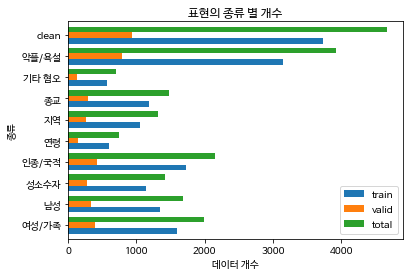

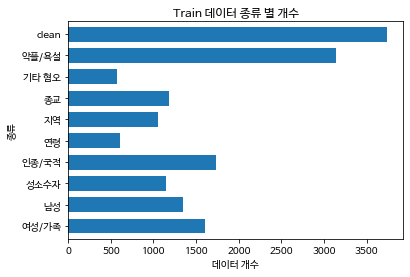

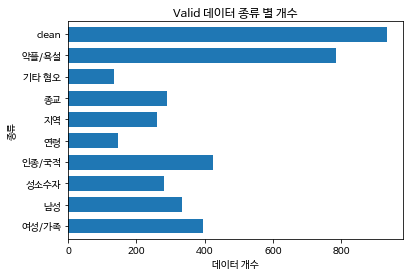

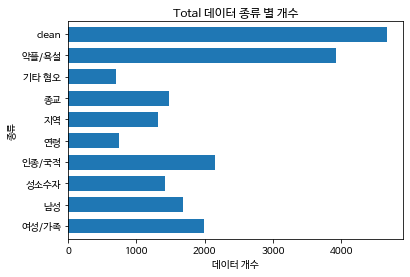

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

df.T.plot.barh(rot=0, width = 0.8)
plt.title("표현의 종류 별 개수")
plt.xlabel("데이터 개수")
plt.ylabel("종류")
plt.show()

df.loc['train'].plot.barh(rot=0, width = 0.7)
plt.title("Train 데이터 종류 별 개수")
plt.xlabel("데이터 개수")
plt.ylabel("종류")
plt.show()

df.loc['valid'].plot.barh(rot=0, width = 0.7)
plt.title("Valid 데이터 종류 별 개수")
plt.xlabel("데이터 개수")
plt.ylabel("종류")
plt.show()

df.loc['total'].plot.barh(rot=0, width = 0.7)
plt.title("Total 데이터 종류 별 개수")
plt.xlabel("데이터 개수")
plt.ylabel("종류")
plt.show()

In [ ]:
unsmile_labels = ["여성/가족","남성","성소수자","인종/국적","연령","지역","종교","기타 혐오","악플/욕설","clean"]
# 개인지칭의 경우, 추가 정보이므로 분류 대상에서 제외했습니다.

# 2. Model load


In [ ]:
from transformers import BertForSequenceClassification, TrainingArguments, Trainer, AutoTokenizer
import torch
import numpy as np

In [ ]:
model_name = 'beomi/kcbert-base'

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

Downloading:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/619 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/250k [00:00<?, ?B/s]

In [ ]:
def preprocess_function(examples):
    tokenized_examples = tokenizer(str(examples["문장"]))
    tokenized_examples['labels'] = torch.tensor(examples["labels"], dtype=torch.float)
    # multi label classification 학습을 위해선 label이 float 형태로 변형되어야 합니다.
    # huggingface datasets 최신 버전에는 'map' 함수에 버그가 있어서 변형이 올바르게 되지 않습니다.
    
    return tokenized_examples

In [ ]:
tokenized_dataset = dataset.map(preprocess_function)
tokenized_dataset.set_format(type='torch', columns=['input_ids', 'labels', 'attention_mask', 'token_type_ids'])

  0%|          | 0/15005 [00:00<?, ?ex/s]

  0%|          | 0/3737 [00:00<?, ?ex/s]

In [ ]:
tokenized_dataset['train'][0]

{'labels': tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 'input_ids': tensor([    2,  2458, 15751, 24930, 24351, 29278, 17038, 11631,     3]),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1])}

In [ ]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
num_labels=len(unsmile_labels) # Label 갯수

model = BertForSequenceClassification.from_pretrained(
    model_name, 
    num_labels=num_labels, 
    problem_type="multi_label_classification"
)
model.config.id2label = {i: label for i, label in zip(range(num_labels), unsmile_labels)}
model.config.label2id = {label: i for i, label in zip(range(num_labels), unsmile_labels)}

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at beomi/kcbert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initiali

In [ ]:
model.config.label2id

{'여성/가족': 0,
 '남성': 1,
 '성소수자': 2,
 '인종/국적': 3,
 '연령': 4,
 '지역': 5,
 '종교': 6,
 '기타 혐오': 7,
 '악플/욕설': 8,
 'clean': 9}

# 3. Model training


In [ ]:
from sklearn.metrics import label_ranking_average_precision_score

In [ ]:
def compute_metrics(x):
    return {
        'lrap': label_ranking_average_precision_score(x.label_ids, x.predictions),
    }

In [ ]:
batch_size = 64 # 64 batch는 colab pro에서 테스트되었습니다.

첫 번째 테스트
LR : 2e-5
epoch : 5

In [ ]:
args = TrainingArguments(
    output_dir="model_output",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=5,
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='lrap',
    greater_is_better=True,
)

trainer = Trainer(
    model=model, 
    args=args, 
    train_dataset=tokenized_dataset["train"], 
    eval_dataset=tokenized_dataset["valid"], 
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
    data_collator=data_collator
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


두 번째 테스트
LR : 1e-5
epoch : 3

In [ ]:
args = TrainingArguments(
    output_dir="model_output",
    evaluation_strategy="epoch",
    learning_rate=1e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='lrap',
    greater_is_better=True,
)

trainer = Trainer(
    model=model, 
    args=args, 
    train_dataset=tokenized_dataset["train"], 
    eval_dataset=tokenized_dataset["valid"], 
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
    data_collator=data_collator
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


세 번째 테스트
LR : 1e-5
epoch : 5

In [ ]:
args = TrainingArguments(
    output_dir="model_output",
    evaluation_strategy="epoch",
    learning_rate=1e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=5,
    save_strategy='epoch',
    load_best_model_at_end=True,
    metric_for_best_model='lrap',
    greater_is_better=True,
)

trainer = Trainer(
    model=model, 
    args=args, 
    train_dataset=tokenized_dataset["train"], 
    eval_dataset=tokenized_dataset["valid"], 
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
    data_collator=data_collator
)

In [ ]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: 여성/가족, 성소수자, 개인지칭, 문장, 종교, 악플/욕설, 남성, 지역, 기타 혐오, 인종/국적, clean, 연령. If 여성/가족, 성소수자, 개인지칭, 문장, 종교, 악플/욕설, 남성, 지역, 기타 혐오, 인종/국적, clean, 연령 are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
***** Running training *****
  Num examples = 15005
  Num Epochs = 5
  Instantaneous batch size per device = 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 1175
  Number of trainable parameters = 108926218


Epoch,Training Loss,Validation Loss,Lrap
1,No log,0.181130,0.871188
2,No log,0.188003,0.873436
3,0.010400,0.196378,0.869505
4,0.010400,0.198826,0.871196
5,0.007500,0.196645,0.870155


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: 여성/가족, 성소수자, 개인지칭, 문장, 종교, 악플/욕설, 남성, 지역, 기타 혐오, 인종/국적, clean, 연령. If 여성/가족, 성소수자, 개인지칭, 문장, 종교, 악플/욕설, 남성, 지역, 기타 혐오, 인종/국적, clean, 연령 are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 3737
  Batch size = 64
Saving model checkpoint to model_output/checkpoint-235
Configuration saved in model_output/checkpoint-235/config.json
Model weights saved in model_output/checkpoint-235/pytorch_model.bin
tokenizer config file saved in model_output/checkpoint-235/tokenizer_config.json
Special tokens file saved in model_output/checkpoint-235/special_tokens_map.json
The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: 여성/가족, 성소수자, 개인지칭, 문장, 종교, 악플/욕설, 남성, 지역, 기타 혐오, 인종/국적

TrainOutput(global_step=1175, training_loss=0.008909590092111142, metrics={'train_runtime': 858.4382, 'train_samples_per_second': 87.397, 'train_steps_per_second': 1.369, 'total_flos': 2415117214625892.0, 'train_loss': 0.008909590092111142, 'epoch': 5.0})

In [ ]:
trainer.save_model()

Saving model checkpoint to model_output
Configuration saved in model_output/config.json
Model weights saved in model_output/pytorch_model.bin
tokenizer config file saved in model_output/tokenizer_config.json
Special tokens file saved in model_output/special_tokens_map.json


# 4. Model test

In [ ]:
from transformers import TextClassificationPipeline

pipe = TextClassificationPipeline(
    model = model,
    tokenizer = tokenizer,
    device=0,
    return_all_scores=True,
    function_to_apply='sigmoid'
    )

/usr/local/lib/python3.8/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


모델 테스트를 위해 다른 혐오 표현 데이터 셋을 불러옴.

In [ ]:
from Korpora import Korpora
corpus = Korpora.load("korean_hate_speech")


    Korpora 는 다른 분들이 연구 목적으로 공유해주신 말뭉치들을
    손쉽게 다운로드, 사용할 수 있는 기능만을 제공합니다.

    말뭉치들을 공유해 주신 분들에게 감사드리며, 각 말뭉치 별 설명과 라이센스를 공유 드립니다.
    해당 말뭉치에 대해 자세히 알고 싶으신 분은 아래의 description 을 참고,
    해당 말뭉치를 연구/상용의 목적으로 이용하실 때에는 아래의 라이센스를 참고해 주시기 바랍니다.

    # Description
    Authors :
        - Jihyung Moon* (inmoonlight@github)
        - Won Ik Cho* (warnikchow@github)
        - Junbum Lee (beomi@github)
        * equal contribution
    Repository : https://github.com/kocohub/korean-hate-speech
    References :
        - Moon, J., Cho, W. I., & Lee, J. (2020). BEEP! Korean Corpus of Online News
          Comments for Toxic Speech Detection. arXiv preprint arXiv:2005.12503.

    We provide the first human-annotated Korean corpus for toxic speech detection and the large unlabeled corpus.
    The data is comments from the Korean entertainment news aggregation platform.

    # License
    Creative Commons Attribution-ShareAlike 4.0 International License.
    Visit here for detail : https://creativec

불러온 데이터 셋으로 혐오 표현 분류 실행

In [ ]:
stringList = []
for text in corpus.dev.get_all_texts():
  stringList.append(text)

sectionList = ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', 
              '종교', '기타 혐오', '악플/욕설', 'clean', '분류', '점수']

df = pd.DataFrame(columns = sectionList, index = stringList)

for string in stringList:
  scores = []
  final = {'score' : 0, 'type' : ''}
  for result in pipe(string)[0]:
    scores.append(result['score'])
    if final['score'] <= result['score']:
      final['score'] = result['score']
      final['type'] = result['label']
  scores.append(final['type'])
  scores.append(final['score'])
  df.loc[string] = scores
df

/usr/local/lib/python3.8/dist-packages/transformers/pipelines/base.py:1043: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,분류,점수
송중기 시대극은 믿고본다. 첫회 신선하고 좋았다.,0.002373,0.001815,0.00158,0.00149,0.001727,0.001187,0.001054,0.001605,0.001875,0.995588,clean,0.995588
지현우 나쁜놈,0.001501,0.001017,0.002674,0.000745,0.000932,0.00031,0.000481,0.001713,0.011455,0.979267,clean,0.979267
알바쓰고많이만들면되지 돈욕심없으면골목식당왜나온겨 기댕기게나하고 산에가서팔어라,0.001515,0.000555,0.001137,0.000732,0.000551,0.001129,0.000563,0.005255,0.978108,0.02083,악플/욕설,0.978108
설마 ㅈ 현정 작가 아니지??,0.001751,0.001626,0.001705,0.000971,0.001285,0.000857,0.000729,0.001034,0.004581,0.993992,clean,0.993992
이미자씨 송혜교씨 돈이 그리 많으면 탈세말고 그돈으로 평소에 불우이웃에게 기부도 좀 하고사시죠.,0.014794,0.001716,0.000499,0.000224,0.000544,0.000206,0.00122,0.003301,0.264037,0.788812,clean,0.788812
...,...,...,...,...,...,...,...,...,...,...,...,...
지현우 범죄 저지르지 않았나요?,0.002083,0.00162,0.001457,0.001363,0.001748,0.000948,0.001117,0.001447,0.002609,0.995529,clean,0.995529
여자인생 망칠 일 있나 ㅋㅋ,0.002456,0.007635,0.000687,0.000604,0.000384,0.000267,0.0005,0.000274,0.908138,0.072223,악플/욕설,0.908138
근데 전라도에서 사고가 났는데 굳이 서울까지 와서 병원에 가느 이유는?,0.004805,0.002217,0.002186,0.002966,0.001326,0.992003,0.003175,0.002835,0.004794,0.008599,지역,0.992003
"할매젖x, 뱃살x, 몸매 s라인, 유륜은 적당해야됨(너무크거나 너무 작아도 x), 엉덩이가 빵빵해야됨",0.996818,0.019801,0.010491,0.021796,0.046582,0.002012,0.005905,0.003533,0.002001,0.003831,여성/가족,0.996818


불러온 데이터 셋의 혐오 표현 종류 별 개수

In [ ]:
sectionList = ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean']

df2 = pd.DataFrame(columns = sectionList, index = ['input'])
numList = []

for section in sectionList:
  temp = df[(df['분류'] == section)]
  numList.append(temp['분류'].count())

df2.loc['input'] = numList
df2

,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
input,33,2,3,8,5,4,1,9,133,273


점수가 낮은 데이터 추출

In [ ]:
df3 = df[(df['점수'] <= 0.6)]
num = df3['분류'].count()
print(num)

print(df3[['점수']].mean())
df3

26
점수    0.368803
dtype: float64


,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,분류,점수
둘이 화장실가서 싸우길,0.001916,0.00055,0.002815,0.000691,0.00061,0.000159,0.000205,0.000752,0.538003,0.472178,악플/욕설,0.538003
왜 현우한테 ㅠㅜ,0.000637,0.000444,0.004162,0.174478,0.00027,0.000174,0.000879,0.00049,0.437434,0.032481,악플/욕설,0.437434
하여간 죳티즌들 지들만 양반인척 역겹ㅋㅋㅋㅋ,0.00026,0.294211,0.000223,0.044634,0.000439,0.000907,0.00227,0.009204,0.548063,0.002213,악플/욕설,0.548063
요즘은 용기있는 남자가 없는 듯.. 이러다 손예진 연애도 못하겠네^^;;,0.399209,0.096827,0.005529,0.000218,0.00114,0.00033,0.001475,0.005944,0.001205,0.084106,여성/가족,0.399209
짠돌이보단 낫다,0.001806,0.000849,0.003423,0.002143,0.002597,0.000417,0.000285,0.547504,0.571038,0.011898,악플/욕설,0.571038
구혜선씨 따돌리고 챙기지도 않는 HB엔터는 계약 해지는 왜 아직도 안해주고 있나요?? 더럽게 발목 그만 붙들고 놔주시지?,0.042165,0.027694,0.000505,0.000561,0.000352,0.000264,0.000264,0.000323,0.061412,0.464796,clean,0.464796
아니 남자가 태연을 왜 까냐 그것도 십대도 아닌 30대 남자가 ㅋㅋㅋ 태연만 보면 질질거릴텐데 여자들이나 질투나서 까지 OOO아 ㅋㅋ 한.남앞에두고 뒤에서 화나요나 누르고,0.52369,0.434664,0.008485,0.000195,0.004605,0.000776,0.000498,0.000783,0.039385,0.10985,여성/가족,0.52369
양다리든 몇다리든 연예로 범죄자 취급하네 많이 사귈수있지 이게 범죄인양 떠들지 마라 각자알아서 해결하시지 네이버메인에 왜 올라온겨,0.000412,0.004587,0.002743,0.000563,0.000659,0.000267,0.000636,0.000578,0.546487,0.596816,clean,0.596816
최민수 성질 더러운거 맞음... 세월지났다고 요즘 포장된 것만 보고 착각하는데... 옛날부터 유명했음... 위커힐 죽돌이에 드라마 촬영때도 말 안듣기로 소문이 자자했고,0.077506,0.005109,0.003449,0.001211,0.000737,0.000384,0.000275,0.004013,0.001723,0.036338,여성/가족,0.077506
당시 신재호 나이 5살이었는데 5살짜리가 사기혐의에 적극적으로 개입한거 아니면 법적으로 마닷이 책임질 일은 없다 . ㅎ,0.000213,0.002902,0.002879,0.058657,0.002384,0.000468,0.009491,0.000354,0.372582,0.00504,악플/욕설,0.372582


점수가 높은 데이터 추출

In [ ]:
df4 = df[(df['점수'] >= 0.95)]
num = df4['분류'].count()
print(num)

print(df4[['점수']].mean())
df4

372
점수    0.990772
dtype: float64


,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,분류,점수
송중기 시대극은 믿고본다. 첫회 신선하고 좋았다.,0.002373,0.001815,0.00158,0.00149,0.001727,0.001187,0.001054,0.001605,0.001875,0.995588,clean,0.995588
지현우 나쁜놈,0.001501,0.001017,0.002674,0.000745,0.000932,0.00031,0.000481,0.001713,0.011455,0.979267,clean,0.979267
알바쓰고많이만들면되지 돈욕심없으면골목식당왜나온겨 기댕기게나하고 산에가서팔어라,0.001515,0.000555,0.001137,0.000732,0.000551,0.001129,0.000563,0.005255,0.978108,0.02083,악플/욕설,0.978108
설마 ㅈ 현정 작가 아니지??,0.001751,0.001626,0.001705,0.000971,0.001285,0.000857,0.000729,0.001034,0.004581,0.993992,clean,0.993992
아이즈원 힘내세요...일본 진출도 했으니 일본서 좋은 모습 보여줘도 팬들은 응원 합니다.,0.002538,0.00149,0.001743,0.001522,0.001458,0.001004,0.000817,0.001449,0.002386,0.995316,clean,0.995316
...,...,...,...,...,...,...,...,...,...,...,...,...
강용석도 찌질하네 과거들추기는 추하다,0.000912,0.002201,0.00196,0.001319,0.001213,0.000811,0.000984,0.002431,0.995001,0.002046,악플/욕설,0.995001
그래도 좋은 노래 많았는데ㅠ,0.001309,0.001324,0.001736,0.001313,0.001137,0.000837,0.000834,0.001483,0.002987,0.993911,clean,0.993911
지현우 범죄 저지르지 않았나요?,0.002083,0.00162,0.001457,0.001363,0.001748,0.000948,0.001117,0.001447,0.002609,0.995529,clean,0.995529
근데 전라도에서 사고가 났는데 굳이 서울까지 와서 병원에 가느 이유는?,0.004805,0.002217,0.002186,0.002966,0.001326,0.992003,0.003175,0.002835,0.004794,0.008599,지역,0.992003


# 5. Model evaluation


In [ ]:
def get_predicated_label(output_labels, min_score):
    labels = []
    for label in output_labels:
        if label['score'] > min_score:
            labels.append(1)
        else:
            labels.append(0)
    return labels

In [ ]:
import tqdm
from transformers.pipelines.base import KeyDataset

predicated_labels = []

for out in tqdm.tqdm(pipe(KeyDataset(dataset['valid'], '문장'))):
    predicated_labels.append(get_predicated_label(out, 0.5))

/usr/local/lib/python3.8/dist-packages/transformers/pipelines/base.py:1043: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 3737/3737 [00:35<00:00, 106.68it/s]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(dataset['valid']['labels'], predicated_labels))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       394
           1       0.84      0.85      0.85       334
           2       0.85      0.88      0.87       280
           3       0.85      0.81      0.83       426
           4       0.88      0.88      0.88       146
           5       0.89      0.91      0.90       260
           6       0.87      0.88      0.88       290
           7       0.62      0.43      0.51       134
           8       0.71      0.63      0.67       786
           9       0.72      0.76      0.74       935

   micro avg       0.78      0.77      0.78      3985
   macro avg       0.80      0.78      0.79      3985
weighted avg       0.78      0.77      0.77      3985
 samples avg       0.77      0.77      0.77      3985



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 테스트 결과 비교

세 가지 테스트 결과를 비교해보겠다.

Traing Loss, Validation Loss 비교

In [ ]:
import numpy as py

columnList = ['Training Loss Avg', 'Validation Loss Avg']
rowList = ['First', 'Second', 'Third']

firstTL = np.array([0.030000, 0.030000, 0.020900])
firstVL = np.array([0.156200, 0.169426, 0.167622, 0.172017, 0.1733067])
secondTL = np.array([0.053100])
secondVL = np.array([0.130521, 0.134979, 0.139729])
thirdTL = np.array([0.010400, 0.010400, 0.007500])
thirdVL = np.array([0.181130, 0.188003, 0.196378, 0.198826, 0.196645])

dataDictList = [
    {'Training Loss Avg' : np.mean(firstTL), 'Validation Loss Avg' : np.mean(firstVL)},
    {'Training Loss Avg' : np.mean(secondTL), 'Validation Loss Avg' : np.mean(secondVL)},
    {'Training Loss Avg' : np.mean(thirdTL), 'Validation Loss Avg' : np.mean(thirdVL)}
]
df = pd.DataFrame(dataDictList, columns = columnList, index = rowList)

df

,Training Loss Avg,Validation Loss Avg
First,0.026967,0.167714
Second,0.053100,0.135076
Third,0.009433,0.192196


데이터 셋의 혐오 표현 종류 별 개수 비교

In [ ]:
columnList = ['여성/가족', '남성', '성소수자', '인종/국적', '연령', '지역', '종교', '기타 혐오', '악플/욕설', 'clean']
rowList = ['First', 'Second', 'Third']

first = np.array([40,1,1,9,5,5,1,12,150,247])
second = np.array([32,3,2,9,5,5,1,7,144,263])
third = np.array([33,2,3,8,5,4,1,9,133,273])

data = [first, second, third]

df = pd.DataFrame(data = data, columns = columnList, index = rowList)

df

,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean
First,40,1,1,9,5,5,1,12,150,247
Second,32,3,2,9,5,5,1,7,144,263
Third,33,2,3,8,5,4,1,9,133,273


점수가 낮은 데이터(0.6 이하) 비교

In [ ]:
columnList = ['개수', '평균']
rowList = ['First', 'Second', 'Third']

first = np.array([26, 0.412946])
second = np.array([40, 0.451837])
third = np.array([26, 0.368803])

data = [first, second, third]

df = pd.DataFrame(data = data, columns = columnList, index = rowList)

df

,개수,평균
First,26.0,0.412946
Second,40.0,0.451837
Third,26.0,0.368803


점수가 높은 데이터(0.95 이상) 비교

In [ ]:
columnList = ['개수', '평균']
rowList = ['First', 'Second', 'Third']

first = np.array([355, 0.986845])
second = np.array([257, 0.97112])
third = np.array([372, 0.990772])

data = [first, second, third]

df = pd.DataFrame(data = data, columns = columnList, index = rowList)

df

,개수,평균
First,355.0,0.986845
Second,257.0,0.971120
Third,372.0,0.990772


성능 평가 비교 (Samples average)

In [ ]:
columnList = ['Precision', 'Recall', 'F1 Score']
rowList = ['First', 'Second', 'Third']

first = np.array([0.78, 0.78, 0.77])
second = np.array([0.78, 0.78, 0.77])
third = np.array([0.77, 0.77, 0.77])

data = [first, second, third]

df = pd.DataFrame(data = data, columns = columnList, index = rowList)

df

,Precision,Recall,F1 Score
First,0.78,0.78,0.77
Second,0.78,0.78,0.77
Third,0.77,0.77,0.77
